<html>
    <body>
        <h1 class="alert alert-info" style="text-align: center;">NYC Taxi Trip Duration: A Machine Learning Approach to Predicting Duration of a New York taxi trip</h1>
        <h2 id="contents">Table of Contents</h2>
        <ol>
            <a href="#section1"><li>Importing libraries and loading the dataset</li></a>
            <a href="#section2"><li>Exploring the dataset</li></a>
            <a href="#section3"><li>Data cleaning</li></a>
            <a href="#section4"><li>Exploratory data analysis</li></a>
            <ol>
                <a href="#sub_section1_1"><li type="i">Univariate analysis</li></a>
                <a href="#sub_section1_2"><li type="i">Bivariate analysis</li></a>
            </ol>        
            <a href="#section5"><li>Data Prepocessing</li></a>
            <a href="#section6"><li>Model Building and Evaluation</li></a>
            <ol>
                <a href="#sub_section2_1"><li type="i">Linear Regrassion</li></a>
            </ol> 
        </ol>
    </body>
</html>

<div class="col-md-8">
    <h2 id="section1">1. Importing libraries and loading the dataset</h2>
    <p>Let's start by importing the necessary libraries and loading the dataset.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
import os
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

warnings.filterwarnings(action = 'ignore')

In [26]:
# Read the data
df_nyc = pd.read_csv('../input/NYC_Taxi_Trip/nyc_taxi_trip_duration.csv')

<div class="col-md-8">
    <h2 id="section2">2. Exploring the dataset</h2>
    <p>Let's explore the datasets:</p>
</div>
<div class="col-md-4">
    <a href="#contens">Back to top</h2>
</div>

In [27]:
# Shape of the data
print('Shape of the data: %s', df_nyc.shape)

Shape of the data: %s (729322, 11)


In [28]:
# Sample train data
df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


<p>Let's explore the dataset to get a better understanding of its structure and content:</p>

In [30]:
# Data information
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [29]:
# Summary statistics
df_nyc.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [31]:
# Unique values in each column
df_nyc.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

<div class="col-md-8">
    <h3 id="section3">3. Data cleaning</h3>
    <p>Nice! We have a dataset with <b>729322</b> rows and <b>11</b> columns. Let's clean the dataset by handling missing values, duplicates, irrelevant columns, and converting data types.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [32]:
# Let's create a copy of the train and test data to perform data cleaning
df_nyc_copy = df_nyc.copy()

In [33]:
# Missing values in train data
df_nyc_copy.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<p>Great! No missing values. Let's jump to the next step</p>

In [34]:
# Check for duplicates in train data
df_nyc_copy.duplicated().sum()

0

<p>No duplicates in the dataset! Let's move on to the next step.</p>

<p>Let's convert pickup_datetime & dropoff_datetime to a datetime and convert vendor_id, passenger_count, store_and_fwd_flag to categorical variables.</p>

In [35]:
df_nyc_copy['pickup_datetime'] = pd.to_datetime(df_nyc_copy['pickup_datetime'])
df_nyc_copy['dropoff_datetime'] = pd.to_datetime(df_nyc_copy['dropoff_datetime'])

df_nyc_copy['vendor_id'] = df_nyc_copy['vendor_id'].astype('category')
df_nyc_copy['passenger_count'] = df_nyc_copy['passenger_count'].astype('category')
df_nyc_copy['store_and_fwd_flag'] = df_nyc_copy['store_and_fwd_flag'].astype('category')

<div class="col-md-8">
    <h3 id="section4">4. Exploratory data analysis</h3>
    <p>Let's perform exploratory data analysis to extract insights from the cab trips dataset:</p>
    <h4 id="sub_section1_1" >i. Univariate analysis</h4>
    <p>We will start by exploring the distribution of the numerical and categorical variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [37]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='dodgerblue')
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[_min,_max], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Creating a DataFrame for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                    'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))


In [36]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

<p>Here trip_duration column is our target variable. Let's explore its distribution.</p>

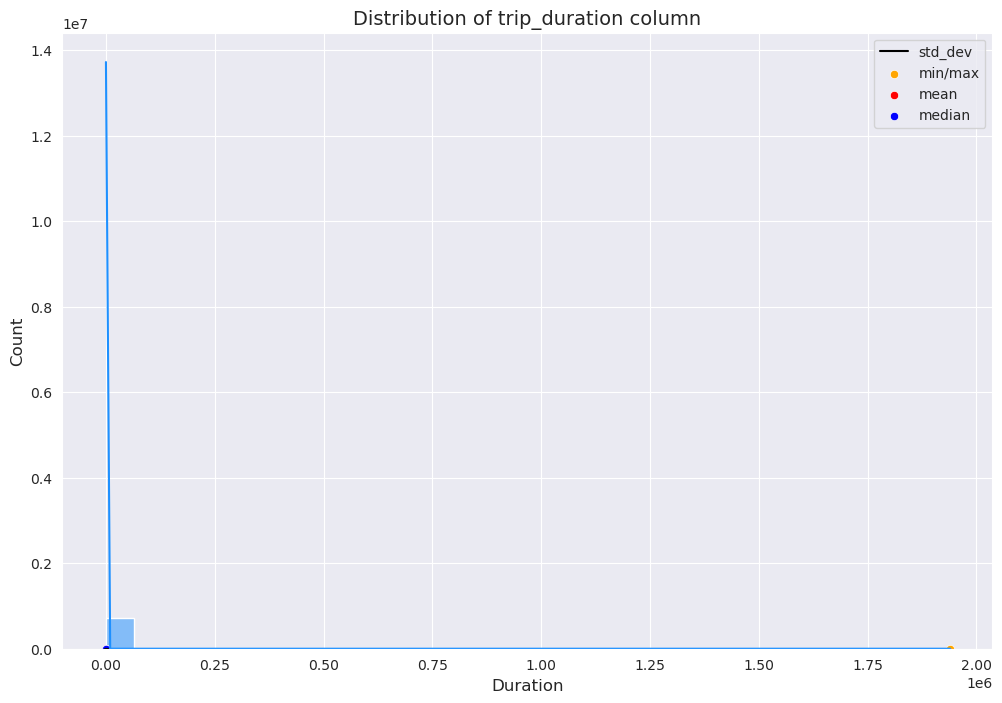

Statistics,Value
Minimum Value,1
Maximum Value,1.93974e+06
Range,1.93974e+06
Mean,952.229
Median,663
Standard Deviation,3864.63
Skewness,186.678
Kurtosis,87142.5


In [38]:
# Plot distribution of Duration Column
plot_dist(df_nyc_copy, 'trip_duration', 'Duration', 'Count', 'Distribution of trip_duration column')

<p>Kurtosis of trip_duration is very high. So Fare is highly skewed to the right side.</p>
<p>Which is as expected, because some long trips.</p>
<p>Minimum trip duration is 1 second, which seems to be incorrect or some trip got canceled, we need to expolre this futher.</p>

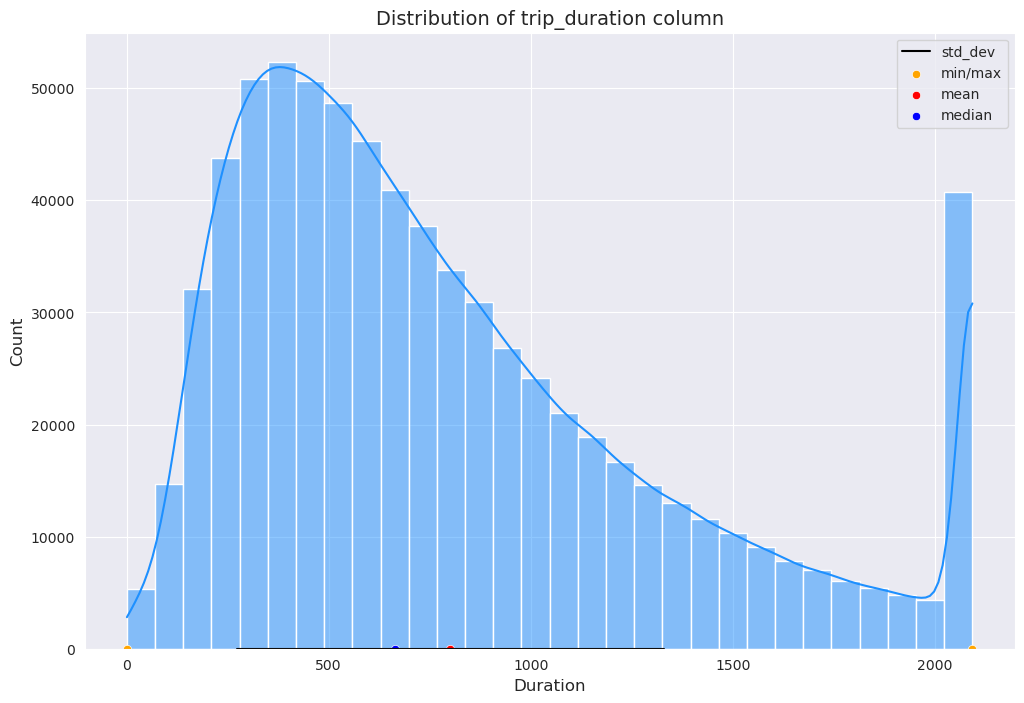

Statistics,Value
Minimum Value,1
Maximum Value,2092
Range,2091
Mean,801.068
Median,663
Standard Deviation,528.87
Skewness,0.965068
Kurtosis,0.142751


In [39]:
# Let's impute the outliers with whiskers value and check the distribution again
# Calculate the IQR of the trip_duration column
Q1 = df_nyc_copy['trip_duration'].quantile(0.25)
Q3 = df_nyc_copy['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Replace outliers with whisker values
df_nyc_copy['trip_duration'] = df_nyc_copy['trip_duration'].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

# Plot distribution of Duration Column
plot_dist(df_nyc_copy, 'trip_duration', 'Duration', 'Count', 'Distribution of trip_duration column')

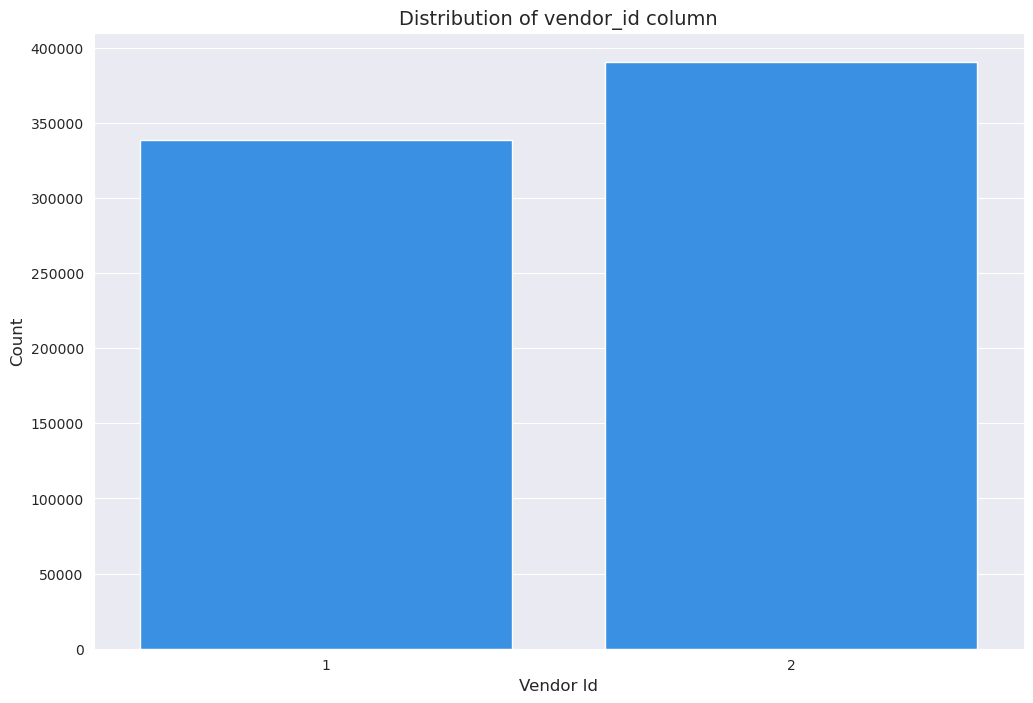

In [40]:
# Plotting distribution of  column
plot_cat(df_nyc_copy, 'vendor_id', 'Vendor Id', 'Count', 'Distribution of vendor_id column')

<p>Vendor Id has a good mix of values</p>

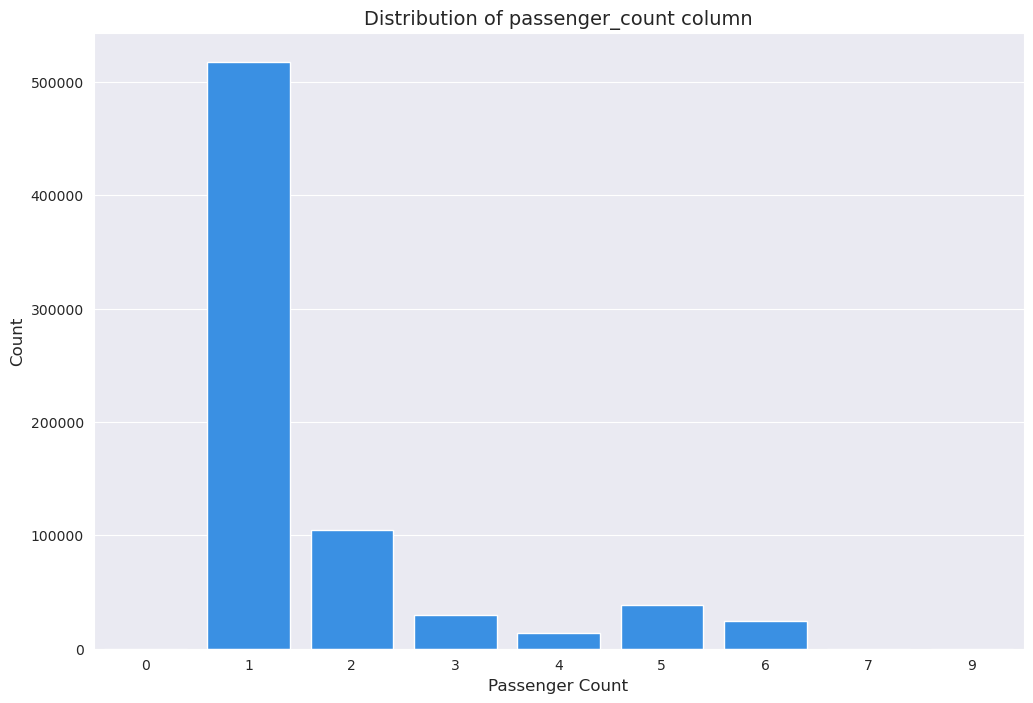

In [41]:
# Plottting distribution of SibSp column
plot_cat(df_nyc_copy, 'passenger_count', 'Passenger Count', 'Count', 'Distribution of passenger_count column')

<p>Single passenger is most frequent</p>

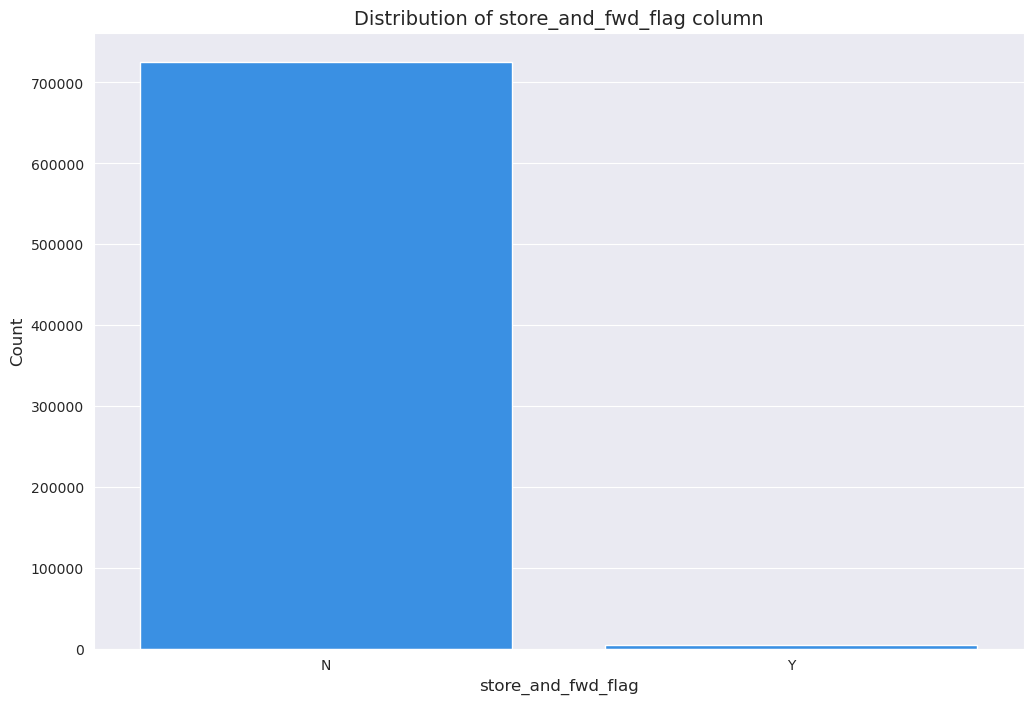

In [42]:
# Plottting distribution of Parch column
plot_cat(df_nyc_copy, 'store_and_fwd_flag', 'store_and_fwd_flag', 'Count', 'Distribution of store_and_fwd_flag column')

<p>For most of the trips store_and_fwd_flag in N</p>

<p>pickup/dropoff_datetime do not provide much information on its own, let's createtwo new variables from these pickup/dropoff day of week and month of year</p>

In [43]:
df_nyc_copy['pickup_day_of_week'] = df_nyc_copy.pickup_datetime.dt.day_name()
df_nyc_copy['pickup_month_of_year'] = df_nyc_copy.pickup_datetime.dt.month_name()
df_nyc_copy['dropoff_day_of_week'] = df_nyc_copy.dropoff_datetime.dt.day_name()
df_nyc_copy['dropoff_month_of_year'] = df_nyc_copy.dropoff_datetime.dt.month_name()
df_nyc_copy.drop(columns=['dropoff_datetime', 'pickup_datetime'], inplace=True)
df_nyc_copy.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_month_of_year,dropoff_day_of_week,dropoff_month_of_year
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,Monday,February,Monday,February
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,Friday,March,Friday,March
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,Sunday,February,Sunday,February
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,Tuesday,January,Tuesday,January
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,Wednesday,February,Wednesday,February


In [44]:
# Let's see if there is any instance where pickup and drop are different
print(df_nyc_copy[df_nyc_copy.pickup_month_of_year != df_nyc_copy.dropoff_month_of_year].shape)
print(df_nyc_copy[df_nyc_copy.pickup_day_of_week != df_nyc_copy.dropoff_day_of_week].shape)

(258, 13)
(8168, 13)


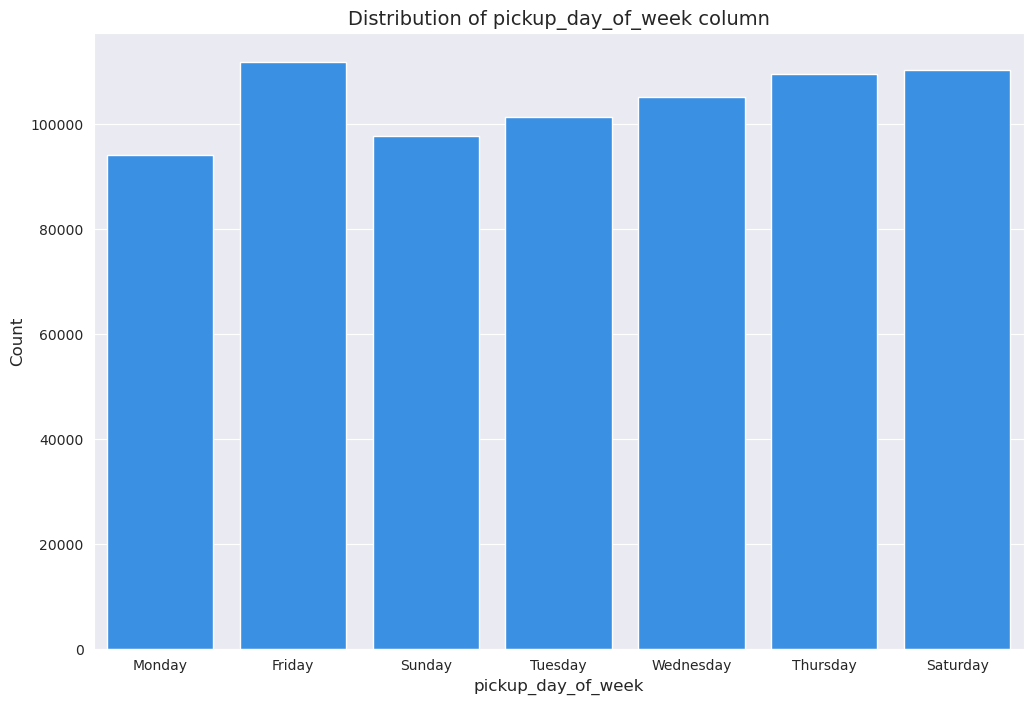

In [45]:
# Plottting distribution of Parch column
plot_cat(df_nyc_copy, 'pickup_day_of_week', 'pickup_day_of_week', 'Count', 'Distribution of pickup_day_of_week column')

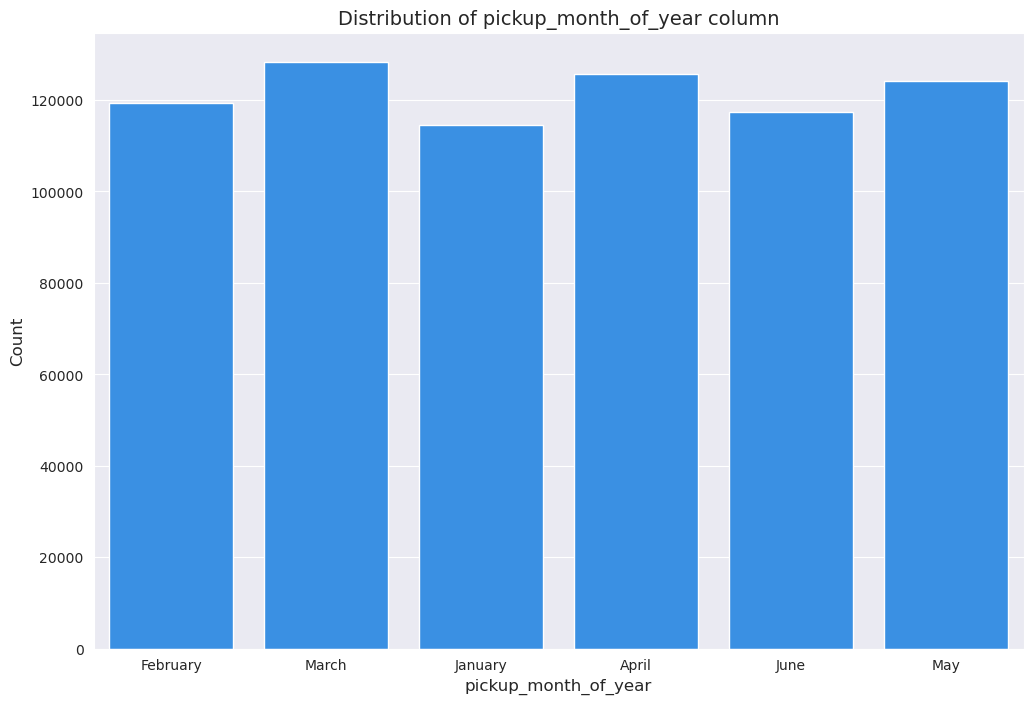

In [46]:
# Plottting distribution of Parch column
plot_cat(df_nyc_copy, 'pickup_month_of_year', 'pickup_month_of_year', 'Count', 'Distribution of pickup_month_of_year column')

<p>Similar to datetime columns lattitude and longitude columns will also not provide much information on thier own, let's create a new column called <b>distanse</b> which is the distance between the pickup and dropoff locations. We will use the <b>haversine's formula</b>.</p>

In [47]:
# Function to calculate the distance between two pairs of latitude and longitude values
def haversine(lat1, lon1, lat2, lon2):
    r = 6371  # Earth radius in kilometers

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return r * c

In [48]:
# apply the function to each row in the DataFrame and create a new column with the results
df_nyc_copy['distance'] = df_nyc_copy.apply(lambda row: haversine(row['pickup_latitude'],
                                                     row['pickup_longitude'],
                                                     row['dropoff_latitude'],
                                                     row['dropoff_longitude']), axis=1)

In [49]:
df_nyc_copy.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)
df_nyc_copy.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_month_of_year,dropoff_day_of_week,dropoff_month_of_year,distance
0,id1080784,2,1,N,400.0,Monday,February,Monday,February,1.199073
1,id0889885,1,2,N,1100.0,Friday,March,Friday,March,4.129111
2,id0857912,2,2,N,1635.0,Sunday,February,Sunday,February,7.250753
3,id3744273,2,6,N,1141.0,Tuesday,January,Tuesday,January,2.361097
4,id0232939,1,1,N,848.0,Wednesday,February,Wednesday,February,4.328534


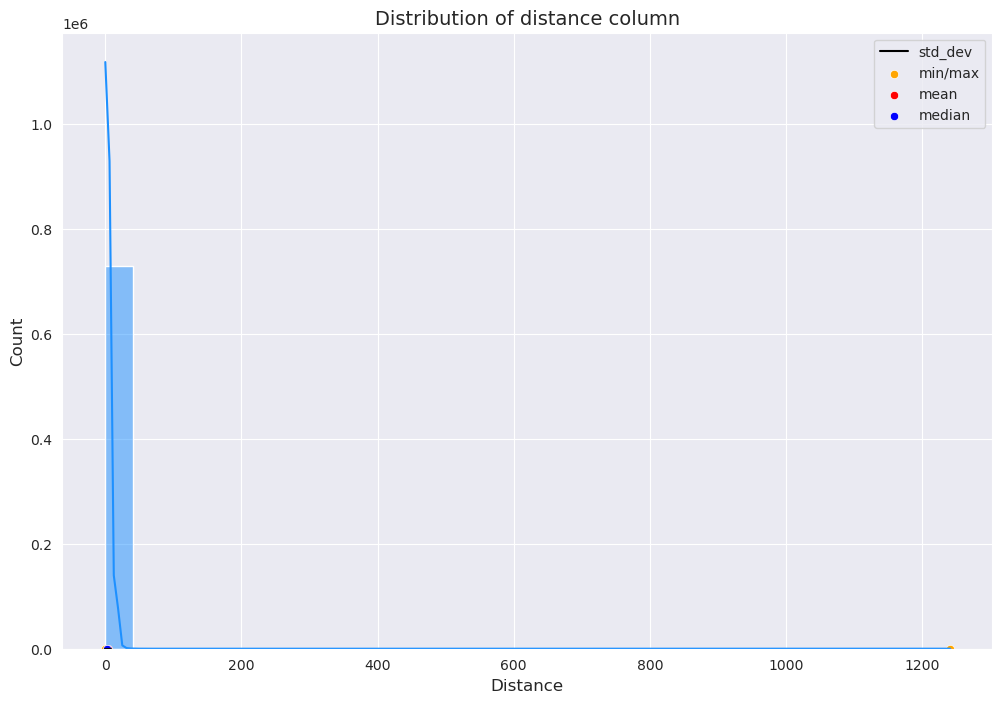

Statistics,Value
Minimum Value,0
Maximum Value,1240.91
Range,1240.91
Mean,3.44114
Median,2.09567
Standard Deviation,4.35313
Skewness,40.9821
Kurtosis,9795.09


In [50]:
# Let's see the distribution of distance variable
plot_dist(df_nyc_copy, 'distance', 'Distance', 'Count', 'Distribution of distance column')

<p>Distance is highly skewd towards right end, which is expected as we have some very high trip durations</p>

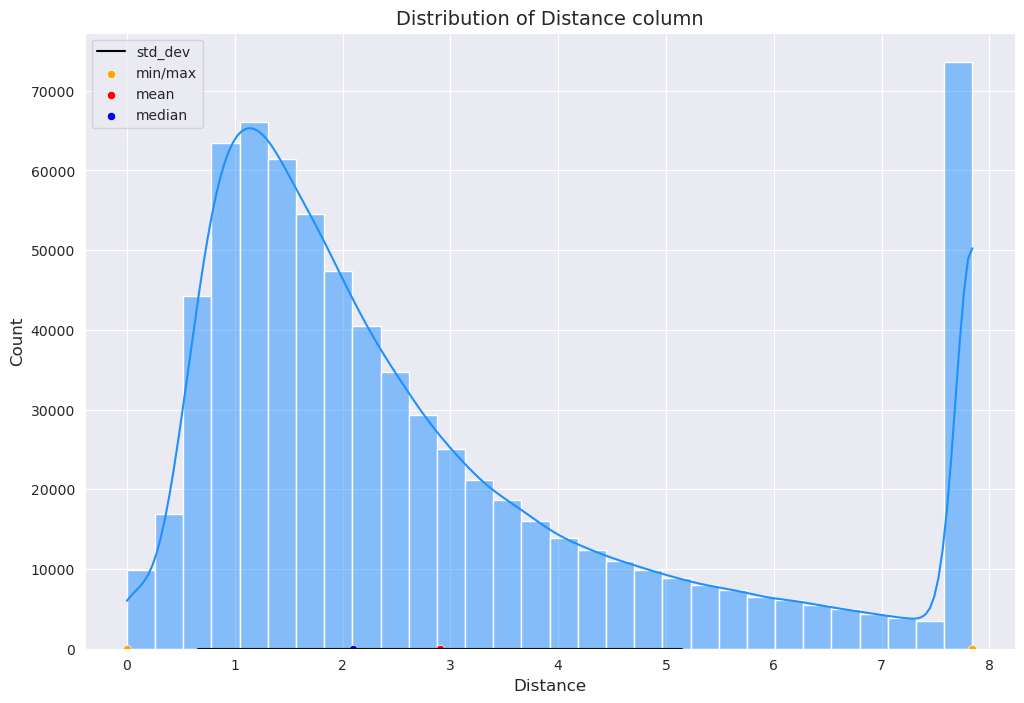

Statistics,Value
Minimum Value,0
Maximum Value,7.84216
Range,7.84216
Mean,2.90136
Median,2.09567
Standard Deviation,2.2456
Skewness,1.09372
Kurtosis,0.0333756


In [51]:
# Let's impute the outliers with whiskers value and check the distribution again
# Calculate the IQR of the trip_duration column
Q1 = df_nyc_copy['distance'].quantile(0.25)
Q3 = df_nyc_copy['distance'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Replace outliers with whisker values
df_nyc_copy['distance'] = df_nyc_copy['distance'].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

# Plot distribution of Duration Column
plot_dist(df_nyc_copy, 'distance', 'Distance', 'Count', 'Distribution of Distance column')

<div class="col-md-8">
    <h4 id="sub_section1_2">ii. Bivariate analysis</h4>
    <p>Let's explore the relationship between the trip duration and other variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [52]:
# Function for plotting the distribution of numeric variables against the target variable
# Here target variable is assumed to be categorical
def plot_num_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x=target, y=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

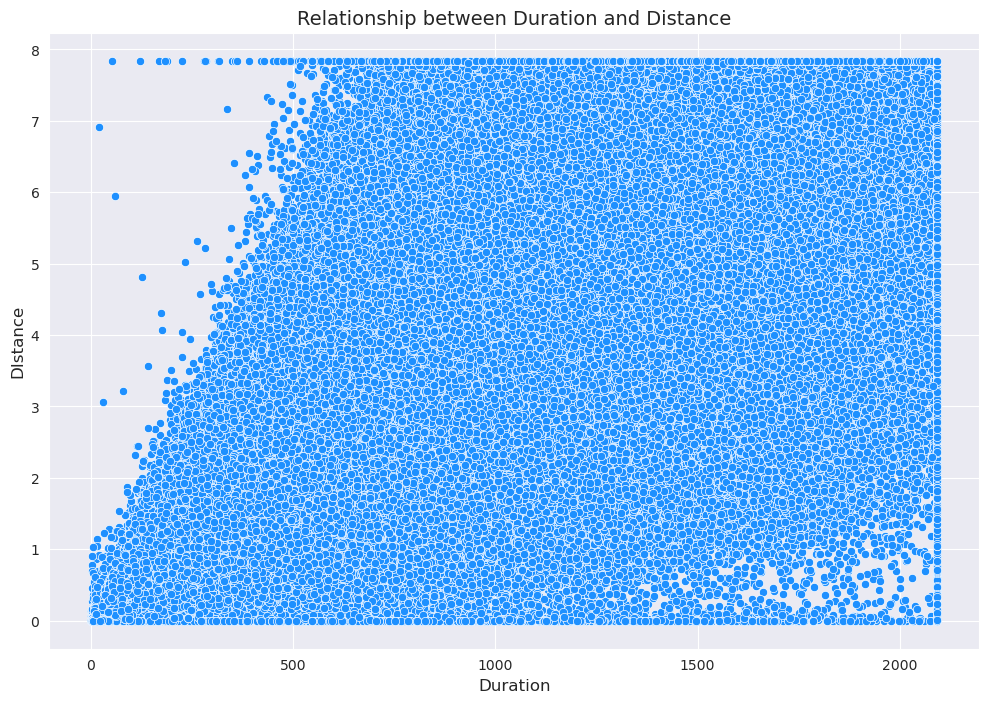

In [53]:
# Relationship between trip_duration and distance
plot_num_vs_target(df_nyc_copy, 'distance', 'trip_duration', 'Duration', 'DIstance', 'Relationship between Duration and Distance')

In [54]:
# Function for plotting the distribution of categorical variables against the target variable
def plot_cat_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=col, y=target, palette='Set1')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

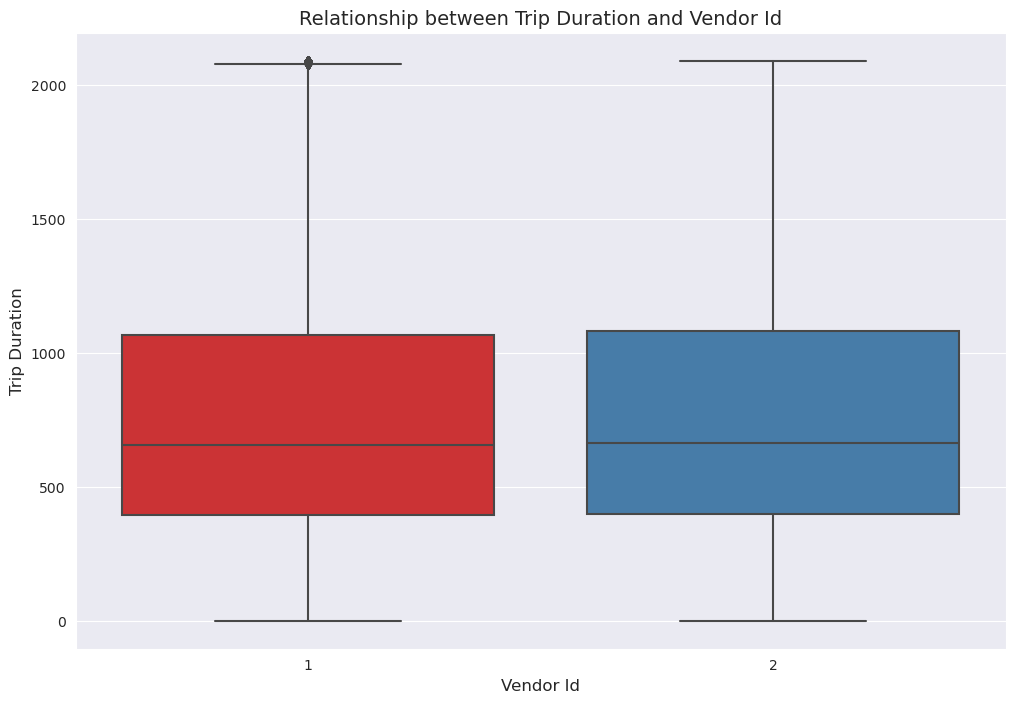

In [55]:
# Relationship between trip_duration and vendor_id
plot_cat_vs_target(df_nyc_copy, 'vendor_id', 'trip_duration', 'Vendor Id', 'Trip Duration', 'Relationship between Trip Duration and Vendor Id')

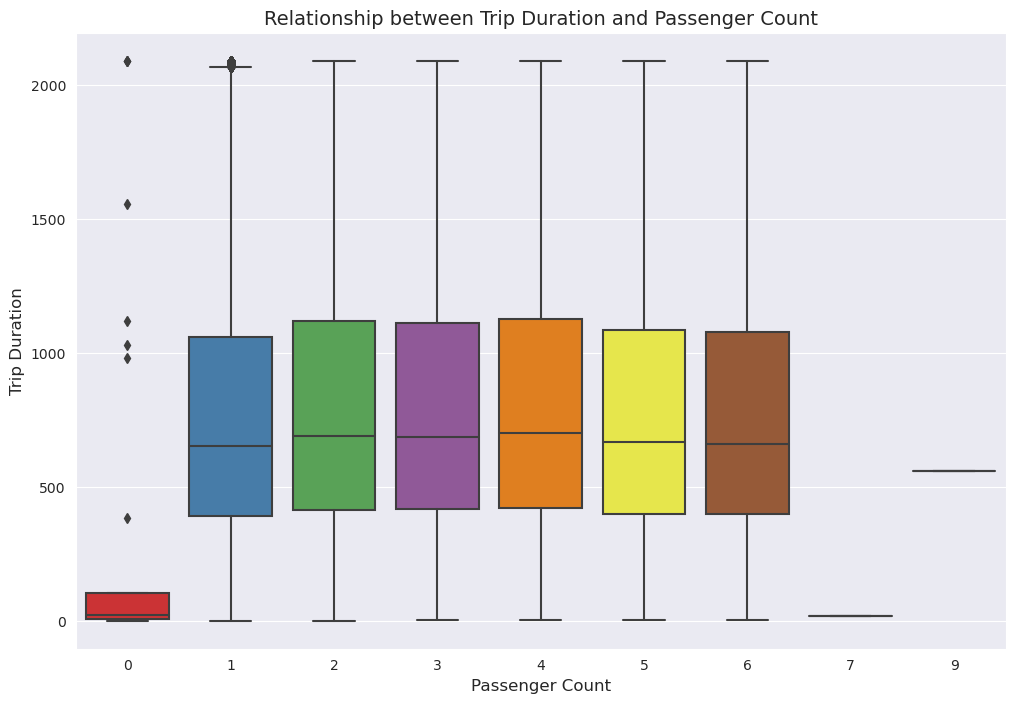

In [56]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'passenger_count', 'trip_duration', 'Passenger Count', 'Trip Duration', 'Relationship between Trip Duration and Passenger Count')

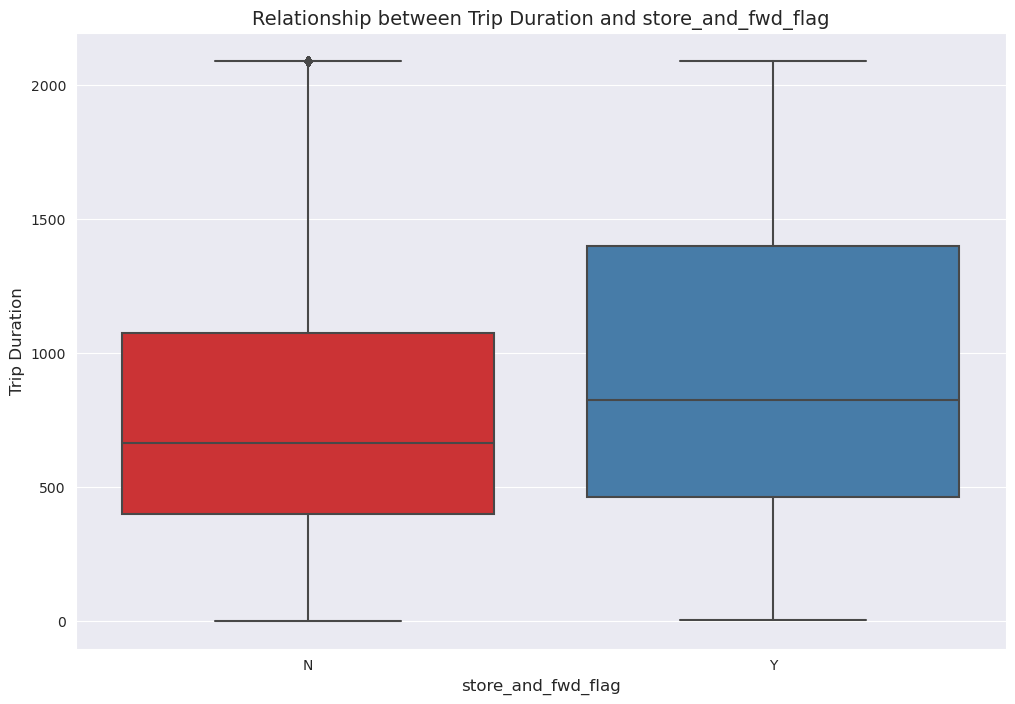

In [57]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'store_and_fwd_flag', 'trip_duration', 'store_and_fwd_flag', 'Trip Duration', 'Relationship between Trip Duration and store_and_fwd_flag')

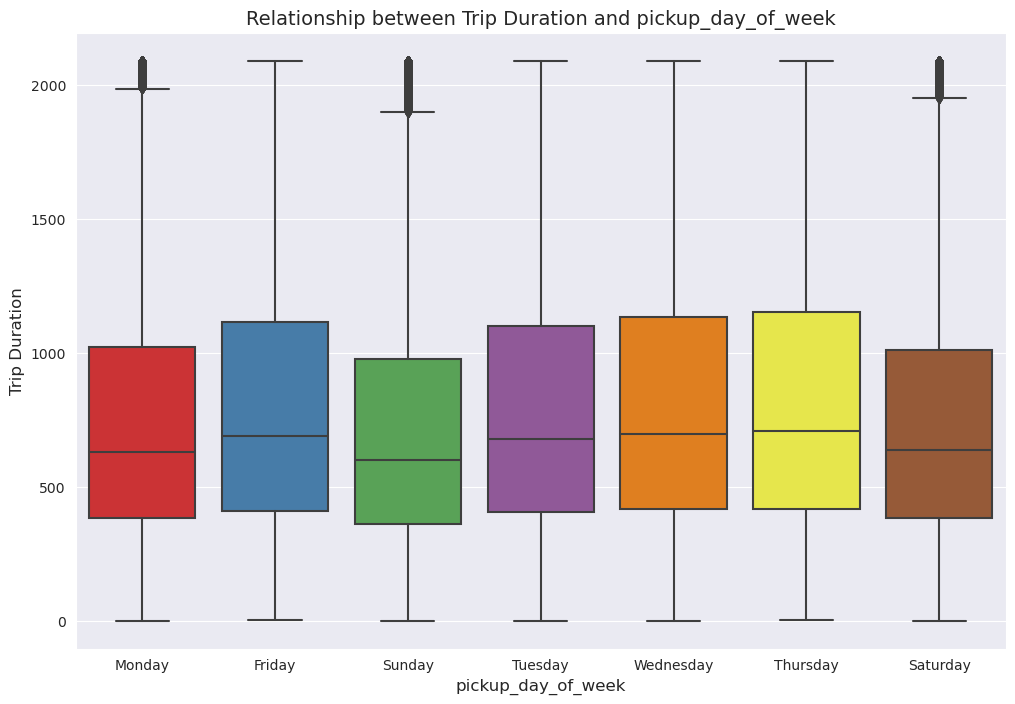

In [58]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'pickup_day_of_week', 'trip_duration', 'pickup_day_of_week', 'Trip Duration', 'Relationship between Trip Duration and pickup_day_of_week')

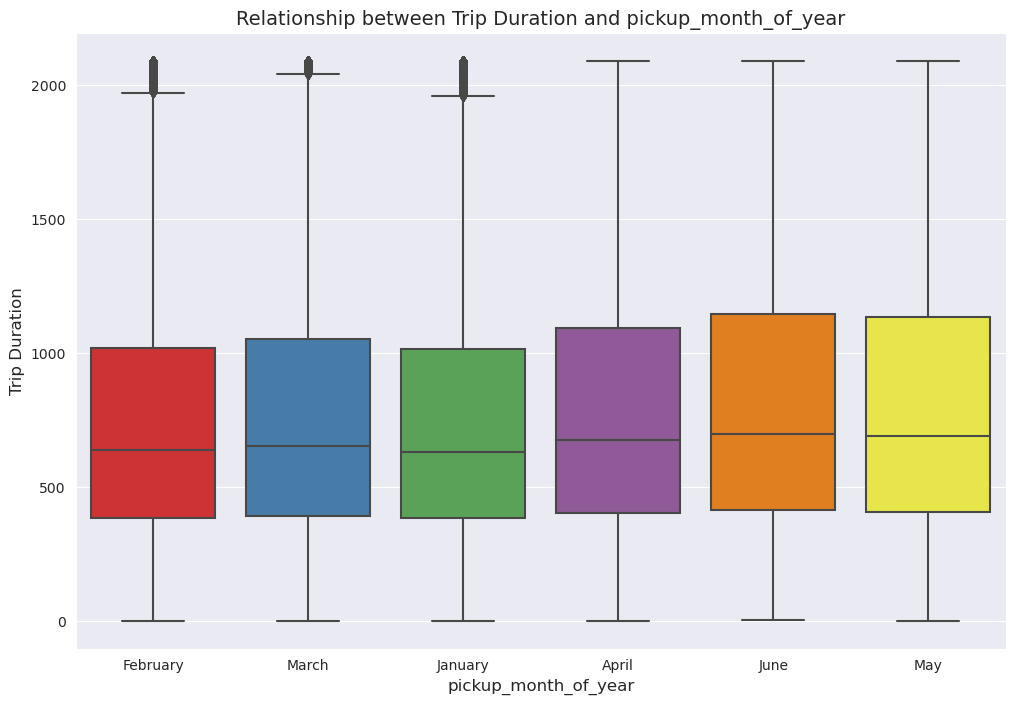

In [59]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'pickup_month_of_year', 'trip_duration', 'pickup_month_of_year', 'Trip Duration', 'Relationship between Trip Duration and pickup_month_of_year')

<div class="col-md-8">
    <h3 id="section5">5. Data Preprocessing</h3>
    <p>Before we use variables in our model, we need to preprocess them. We will perform the following steps:</p>
    <ul>
        <li>One-hot encode categorical variables</li>
        <li>Lable encode categorical variables</li>
    </ul>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [60]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding
from sklearn.preprocessing import LabelEncoder
def encode_cat(df, col, encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

In [61]:
# Encoding variables in the dataset and create a new dataframe called df_train_encoded
df_nyc_encoded = df_nyc_copy.copy()
df_nyc_encoded = encode_cat(df_nyc_encoded, 'vendor_id', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'passenger_count', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'store_and_fwd_flag', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'pickup_day_of_week', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'pickup_month_of_year', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'dropoff_day_of_week', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'dropoff_month_of_year', 'label')


In [62]:
# Check the processed test set
df_nyc_encoded.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_month_of_year,dropoff_day_of_week,dropoff_month_of_year,distance
0,id1080784,1,1,0,400.0,1,1,1,1,1.199073
1,id0889885,0,2,0,1100.0,0,4,0,5,4.129111
2,id0857912,1,2,0,1635.0,3,1,3,1,7.250753
3,id3744273,1,6,0,1141.0,5,2,5,2,2.361097
4,id0232939,0,1,0,848.0,6,1,6,1,4.328534


<p>Now that we have preprocessed the variables, let's check the correlation between them:</p>

In [63]:
# Function to plot correlation between variables
def plot_corr(df, size=10):
    corr = df.corr()
#     print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest')
    plt.show() 

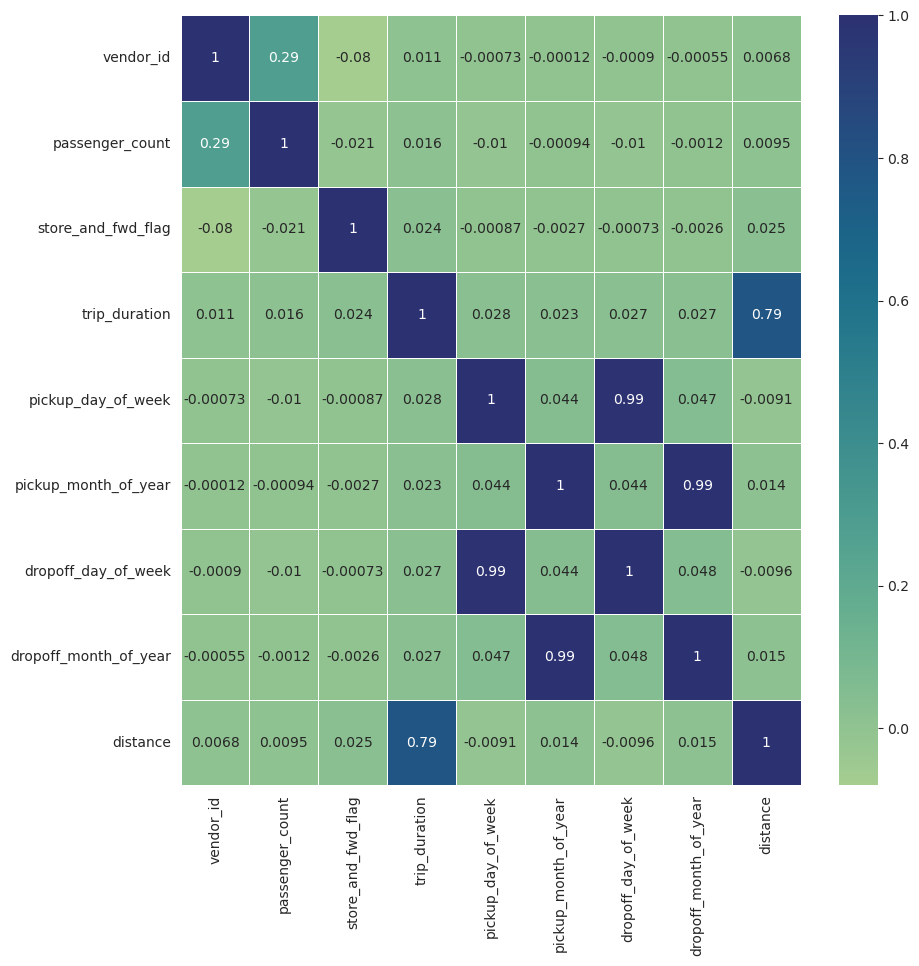

In [64]:
# Correlation between variables in the training set
plot_corr(df_nyc_encoded.drop(['id'], axis=1))

<p>Let's check the correlation between the variables and the target variable:</p>

In [65]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

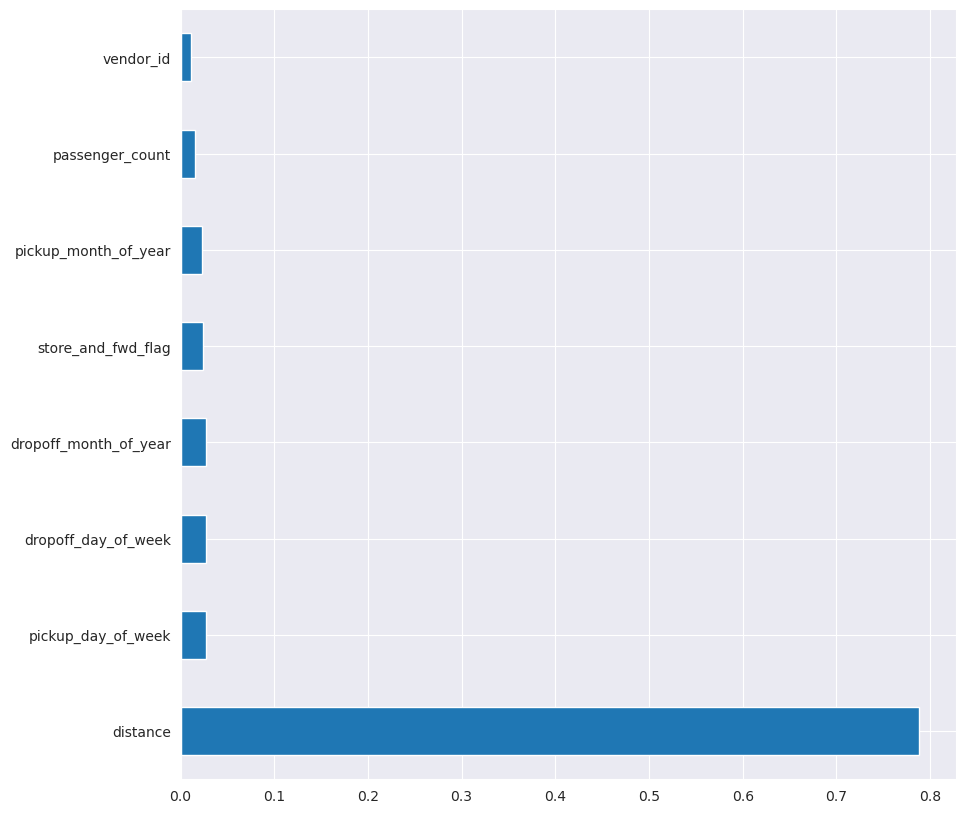

In [66]:
# Check correlation of variables with the target variable
plot_corr_target(df_nyc_encoded.drop(['id'], axis=1), 'trip_duration')

<div class="col-md-8">
    <h3 id="section6">6. Model Building</h3>
    <p>Let's build a model to predict the Survival of passengers on the Titanic:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [67]:
# We will first separate the target variable from the features
y = df_nyc_encoded['trip_duration']
x = df_nyc_encoded.drop(['trip_duration', 'id'], axis=1)
x.shape, y.shape

((729322, 8), (729322,))

<p>Let's scale the features usinf scikit-learn's MinMax scaler:</p>

In [68]:
## Importing the MinMax Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [69]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [70]:
# Check data after scaling
x.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_day_of_week,pickup_month_of_year,dropoff_day_of_week,dropoff_month_of_year,distance
0,0.931533,-0.504446,-0.074634,-0.989805,-0.877306,-0.990271,-0.927275,-0.758055
1,-1.073500,0.257495,-0.074634,-1.486873,0.859292,-1.487691,0.906332,0.546740
2,0.931533,0.257495,-0.074634,0.004331,-0.877306,0.004570,-0.927275,1.936858
3,0.931533,3.305259,-0.074634,0.998466,-0.298440,0.999410,-0.468873,-0.240586
4,-1.073500,-0.504446,-0.074634,1.495534,-0.877306,1.496830,-0.927275,0.635546


<p>Now, let's split the dataset into training and test sets:</p>

In [71]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 50 , stratify=y)


In [72]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((546991, 8), (546991,), (182331, 8), (182331,))

<div class="col-md-8">
    <h3 id="section7">7. Model Generation and Evaluation</h3>
    <p>We will use different classification algorithms to build models and evaluate them using F1 score:</p>
    <h4 id="sub_section2_1">i. Ridge Regression</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [119]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [120]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [121]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)

    
    #Return the result in pre-defined format
    mse_train = mean_squared_error(train_y_pred, train_y)
    ret = [np.sqrt(mse_train)]
    
    mse_test = mean_squared_error(test_y_pred, test_y)
    ret.extend([np.sqrt(mse_test)])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [122]:
#Initialize the dataframe for storing coefficients.
col = ['rmse_train','rmse_test','intercept'] + ['coef_Var_%d'%i for i in range(1,9)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [123]:
#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i])

In [124]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rmse_train,rmse_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8
alpha_0,3.2e+02,3.3e+02,8e+02,1.8,4,2.8,2.1,-1.1e+02,16,1.1e+02,4.2e+02
alpha_1e-08,3.2e+02,3.3e+02,8e+02,1.8,4,2.8,2.1,-1.1e+02,16,1.1e+02,4.2e+02
alpha_0.0001,3.2e+02,3.3e+02,8e+02,1.8,4,2.8,2.1,-1.1e+02,16,1.1e+02,4.2e+02
alpha_0.001,3.2e+02,3.3e+02,8e+02,1.8,4,2.8,2.3,-94,16,1e+02,4.2e+02
alpha_0.01,3.2e+02,3.3e+02,8e+02,1.8,4,2.8,4.6,-41,13,47,4.1e+02
alpha_1,3.9e+02,3.9e+02,8e+02,1.9,2.9,3.8,5.4,2.3,5.5,4,2.1e+02
alpha_5,4.8e+02,4.8e+02,8e+02,0.87,1.2,1.8,2.2,1.4,2.2,1.8,69
alpha_10,5e+02,5e+02,8e+02,0.5,0.69,1,1.2,0.9,1.2,1.1,38
alpha_20,5.1e+02,5.1e+02,8e+02,0.27,0.37,0.57,0.67,0.51,0.67,0.61,20
alpha_25,5.2e+02,5.2e+02,8e+02,0.22,0.3,0.46,0.55,0.42,0.55,0.5,16


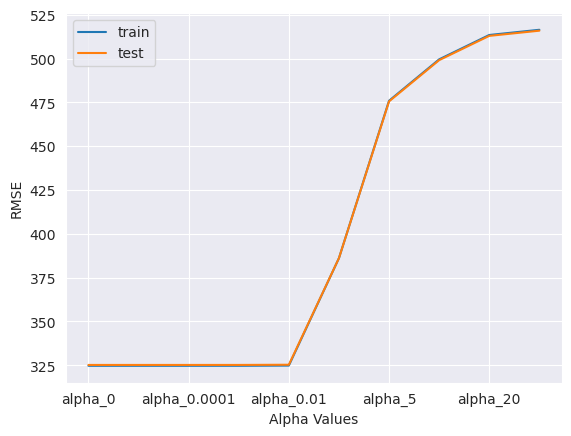

In [126]:
coef_matrix_ridge[['rmse_train','rmse_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])

In [127]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int64

In [128]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
model = Ridge(alpha=1e-8,normalize=True)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x, y)

RFE(estimator=Ridge(alpha=1e-08, normalize=True), n_features_to_select=1)

In [129]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x.columns
ranking_df['Rank'] = rfe.ranking_

In [130]:
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
7,distance,1
6,dropoff_month_of_year,2
4,pickup_month_of_year,3
5,dropoff_day_of_week,4
3,pickup_day_of_week,5
1,passenger_count,6
2,store_and_fwd_flag,7
0,vendor_id,8


In [131]:
cols = ranked['Feature_name'][:6].values

In [134]:
#Fit the model
ridgereg = Ridge(alpha=1e-8,normalize=True)
ridgereg.fit(train_x,train_y)
train_y_pred = ridgereg.predict(train_x)
test_y_pred = ridgereg.predict(test_x)


#Return the result in pre-defined format
mrss_train = mean_squared_error(train_y_pred, train_y)
rmse_train = np.sqrt(mrss_train)

mrss_test = mean_squared_error(test_y_pred, test_y)
rmse_test = np.sqrt(mrss_test)

print('rmse_train:   ', rmse_train)
print('rmse_test:   ', rmse_test)

rmse_train:    324.72592913912666
rmse_test:    325.20518696520617
